In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('./Files')
import macroC as mC
%matplotlib inline

In [5]:
# Definimos el sistema a estudiar.
spins=5
J=100
shots=2048
method='SLSQP' # 'SLSQP'/'COBYLA'
layers=1
# Definimos el tipo de truncación para el que vamos a representar.
typetrunc='NoTrunc' # types=['NoTrunc','Trunc1','Trunc2','Trunc3','Trunc4']

typetrunc=typetrunc+'/'


if shots==0:
    shots=None
name=str(spins)+'SpinsCN-J='+str(J)

In [6]:
# Empezamos a definir el path de los archivos a leer.
directoryFE = 'Data/FE/'+typetrunc
directoryH = 'Data/H/'+typetrunc

fileFE =directoryFE+name+'-'+method+'-'+'Layers='+str(layers)+'-'+'Shots='+str(shots)+'.dat'
fileH =directoryH+name+'-'+method+'-'+'Layers='+str(layers)+'-'+'Shots='+str(shots)+'.dat'

In [7]:
# Creamos las listas vacías de los datos que vamos a leer
dataFE=[i.strip().split() for i in open(fileFE).readlines()]
dataH=[i.strip().split() for i in open(fileH).readlines()]

N_sites=len(mC.systemCN(spins,J)[1])

In [8]:
nbetasFE=len(dataFE)
betasFE=[float(dataFE[i][0]) for i in range(nbetasFE)]
sortindexFE=np.argsort(betasFE)
betasFE=np.sort(betasFE)
overlapsFE=[float(dataFE[sortindexFE[i]][1]) for i in range(nbetasFE)]
niterFE=[float(dataFE[sortindexFE[i]][2]) for i in range(nbetasFE)]
timesFE=[float(dataFE[sortindexFE[i]][3]) for i in range(nbetasFE)]

nbetasH=len(dataH)
betasH=[float(dataH[i][0]) for i in range(nbetasH)]
sortindexH=np.argsort(betasH)
betasH=np.sort(betasH)
overlapsH=[float(dataH[sortindexH[i]][1]) for i in range(nbetasH)]
niterH=[float(dataH[sortindexH[i]][2]) for i in range(nbetasH)]
timesH=[float(dataH[sortindexH[i]][3]) for i in range(nbetasH)]

energFE=[]
for k in range(nbetasFE):
    energk=[float(dataFE[sortindexFE[k]][i+4]) for i in range(int(2**N_sites))]
    energFE.append(energk)

energH=[]
for k in range(nbetasH):
    energk=[float(dataH[sortindexH[k]][i+4]) for i in range(int(2**N_sites))]
    energH.append(energk)

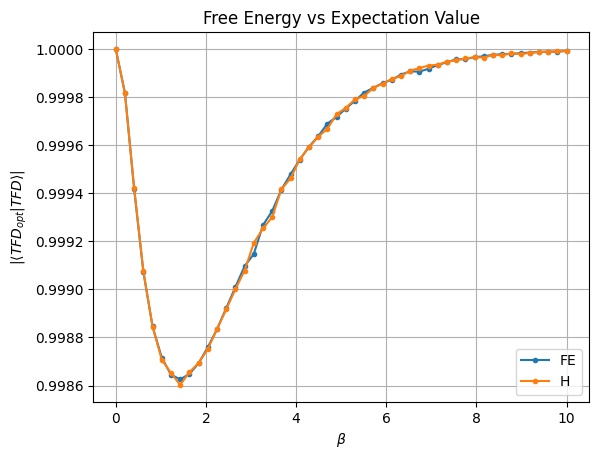

In [9]:
plt.plot(betasFE, overlapsFE, '.-', label='FE')
plt.plot(betasH, overlapsH, '.-', label='H')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.title('Free Energy vs Expectation Value')
plt.legend()
plt.grid()
plt.show()

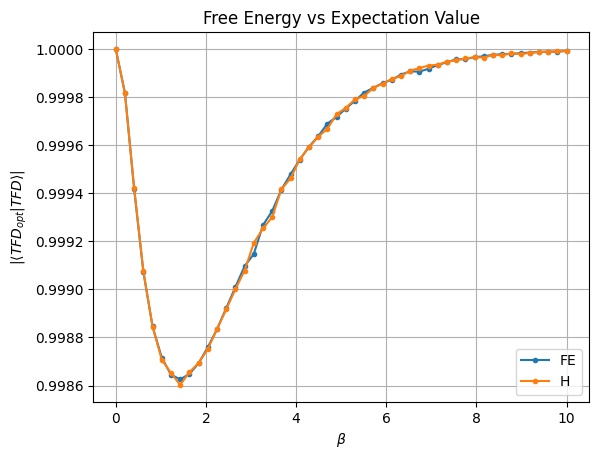

In [18]:
plt.plot(betasFE[:75], overlapsFE[:75], '.-', label='FE')
plt.plot(betasH[:75], overlapsH[:75], '.-', label='H')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.title('Free Energy vs Expectation Value')
plt.legend()
plt.grid()
plt.show()

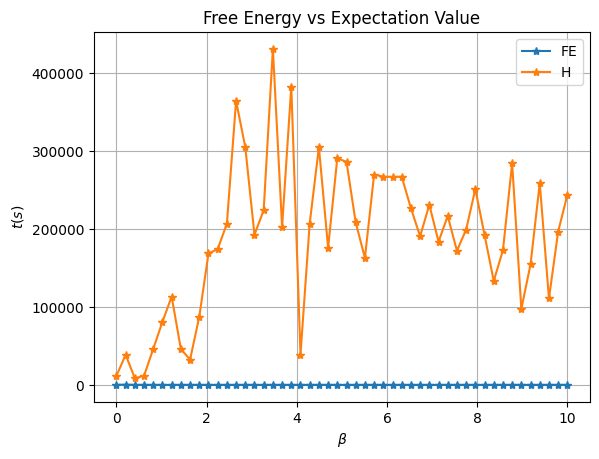

In [11]:
plt.plot(betasFE, timesFE, '*-', label='FE')
plt.plot(betasH, timesH, '*-', label='H')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$t (s)$')
plt.title('Free Energy vs Expectation Value')
plt.legend()
plt.grid()
plt.show()

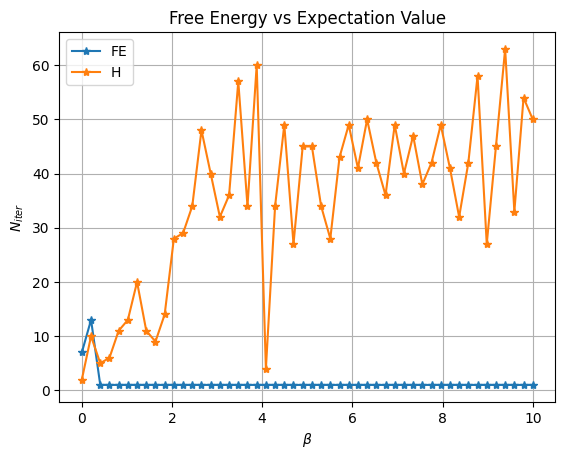

In [12]:
plt.plot(betasFE, niterFE, '*-', label='FE')
plt.plot(betasH, niterH, '*-', label='H')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N_{iter}$')
plt.title('Free Energy vs Expectation Value')
plt.legend()
plt.grid()
plt.show()

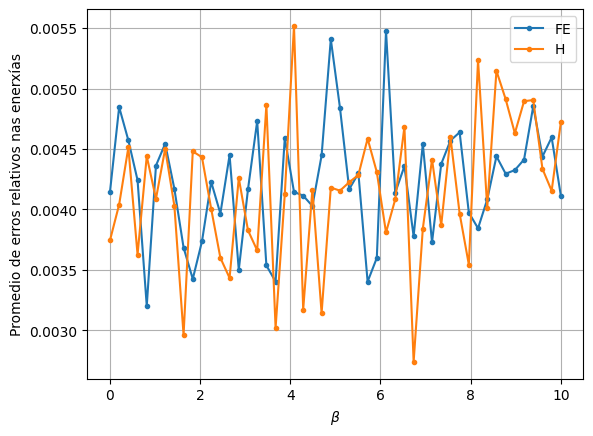

In [13]:
[H,shifts, Jlist, B, offset]=mC.systemCN(spins,J)

factor=1000
Eteo=np.sort(np.linalg.eig(H.to_matrix())[0])
EFE=[np.sort(energFE[j])*factor for j in range(len(betasFE))]
relerrorFE=[1/(len(Eteo))*sum([abs((EFE[i][j]-Eteo[j])/Eteo[j]) for j in range(len(Eteo))]) for i in range(len(betasFE))]
EH=[np.sort(energH[j])*factor for j in range(len(betasH))]
relerrorH=[1/(len(Eteo))*sum([abs((EH[i][j]-Eteo[j])/Eteo[j]) for j in range(len(Eteo))]) for i in range(len(betasH))]
plt.plot(betasFE[:75], relerrorFE[:75], '.-', label='FE')
plt.plot(betasH[:75], relerrorH[:75], '.-', label='H')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Promedio de erros relativos nas enerxías')
plt.legend()
plt.grid()
plt.show()

In [14]:
index=np.argmax(relerrorFE)

In [15]:
betasFE[index]

np.float64(6.122836734693879)

In [16]:
betasH[index]

np.float64(6.122836734693879)

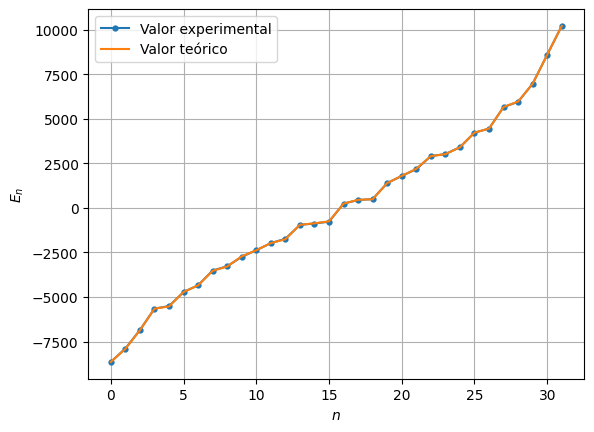

In [17]:
n=len(Eteo)
plt.plot(range(n), EFE[index], '.-', label='Valor experimental', ms=7)
#plt.plot(range(n), EH[index], '-', label='Expectation value')
plt.plot(range(n), np.real(Eteo), '-', label='Valor teórico')
plt.xlabel(r'$n$')
plt.ylabel(r'$E_n$')
plt.legend()
plt.grid()
plt.show()